# EDA and Stock Analysis With Time Series Data of Tesala


In [1]:
!pip install pandas.datareader

In [2]:
import pandas_datareader as pdr
import pandas as pd
from datetime import datetime

In [3]:
tesla=pdr.get_data_yahoo('TSLA')

In [4]:
type(tesla)

pandas.core.frame.DataFrame

In [5]:
tesla.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-02-28,876.859985,814.710022,815.010010,870.429993,33002300.0,870.429993
2022-03-01,889.880005,853.780029,869.679993,864.369995,24922300.0,864.369995
2022-03-02,886.479980,844.270020,872.130005,879.890015,24881100.0,879.890015
2022-03-03,886.440002,832.599976,878.770020,839.289978,20373300.0,839.289978
2022-03-04,855.650024,825.160889,849.099976,838.289978,22294195.0,838.289978


In [6]:
tesla.shape

(1260, 6)

<AxesSubplot:xlabel='Date'>

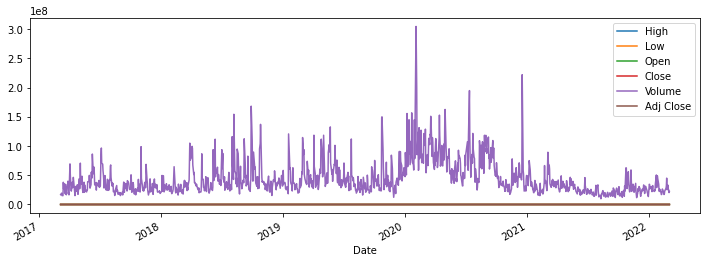

In [7]:
tesla.plot(figsize=(12,4))

<AxesSubplot:xlabel='Date'>

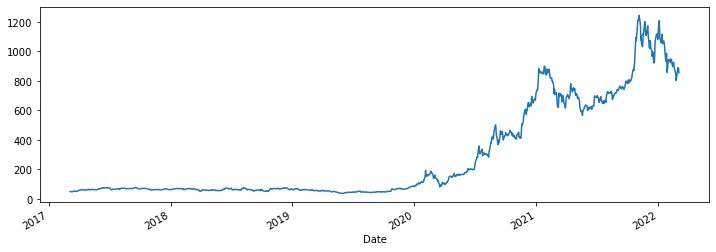

In [8]:
tesla['High'].plot(figsize=(12,4))

<AxesSubplot:xlabel='Date'>

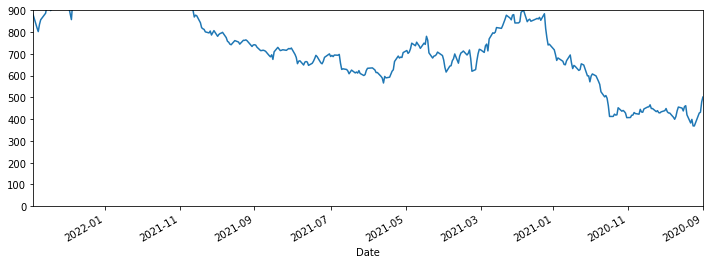

In [9]:
## x limt and y limt
tesla['High'].plot(xlim=['2022-02-28','2020-09-01'],ylim=[0,900],figsize=(12,4))

<AxesSubplot:xlabel='Date'>

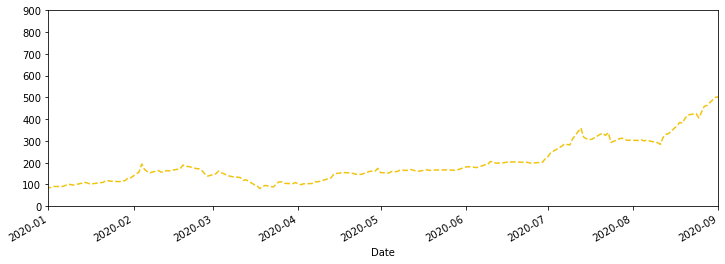

In [10]:
## x limt and y limt and colouring
tesla['High'].plot(xlim=['2020-01-01','2020-09-01'],ylim=[0,900],figsize=(12,4),ls='--',c='#F1C40F')

In [11]:
index=tesla.iloc[0:4].index

In [12]:
index

DatetimeIndex(['2017-03-06', '2017-03-07', '2017-03-08', '2017-03-09'], dtype='datetime64[ns]', name='Date', freq=None)

In [13]:
index=tesla.loc['2022-02-28':'2022-03-03'].index

### Share open at 

In [14]:
share_open=tesla.loc['2022-02-28':'2022-03-03']['Open']
share_open

Date
2022-02-28    815.010010
2022-03-01    869.679993
2022-03-02    872.130005
2022-03-03    878.770020
Name: Open, dtype: float64

In [15]:
index=tesla.index
index

DatetimeIndex(['2017-03-06', '2017-03-07', '2017-03-08', '2017-03-09',
               '2017-03-10', '2017-03-13', '2017-03-14', '2017-03-15',
               '2017-03-16', '2017-03-17',
               ...
               '2022-02-18', '2022-02-22', '2022-02-23', '2022-02-24',
               '2022-02-25', '2022-02-28', '2022-03-01', '2022-03-02',
               '2022-03-03', '2022-03-04'],
              dtype='datetime64[ns]', name='Date', length=1260, freq=None)

In [16]:
import matplotlib as plt
%matplotlib inline

In [17]:
#figure,axis=plt.subplots()
#plt.tight_layout()
#figure.autofmt_xdate()
#axis.plot(index,share_open)

### reating the index

In [18]:
tesla.reset_index(inplace=True)

In [97]:
tesla.set_index("Date")

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-03-06,50.340000,49.501999,49.582001,50.242001,16777500.0,50.242001
2017-03-07,50.778000,49.664001,50.383999,49.717999,17297500.0,49.717999
2017-03-08,50.014000,49.063999,49.400002,49.374001,18626000.0,49.374001
2017-03-09,49.731998,48.599998,49.526001,48.980000,19396500.0,48.980000
2017-03-10,49.299999,48.599998,49.242001,48.737999,15331500.0,48.737999
...,...,...,...,...,...,...
2022-02-28,876.859985,814.710022,815.010010,870.429993,33002300.0,870.429993
2022-03-01,889.880005,853.780029,869.679993,864.369995,24922300.0,864.369995
2022-03-02,886.479980,844.270020,872.130005,879.890015,24881100.0,879.890015


### To convert the object to date format

In [98]:
pd.to_datetime(tesla['Date'])

0      2017-03-06
1      2017-03-07
2      2017-03-08
3      2017-03-09
4      2017-03-10
          ...    
1255   2022-02-28
1256   2022-03-01
1257   2022-03-02
1258   2022-03-03
1259   2022-03-04
Name: Date, Length: 1260, dtype: datetime64[ns]

In [107]:
datetime.now()

datetime.datetime(2022, 3, 5, 11, 32, 12, 711021)

In [105]:
from datetime import datetime

## Time Resampling

yntax : DataFrame.resample(rule, how=None, axis=0, fill_method=None, closed=None, label=None, convention=’start’, kind=None,            loffset=None, limit=None, base=0, on=None, level=None)

Parameters :

rule : the offset string or object representing target conversion

axis : int, optional, default 0

closed : {‘right’, ‘left’}

label : {‘right’, ‘left’}

convention : For PeriodIndex only, controls whether to use the start or end of rule

loffset : Adjust the resampled time labels

base : For frequencies that evenly subdivide 1 day, the “origin” of the aggregated intervals. For example, for ‘5min’ frequency, base could range from 0 through 4. Defaults to 0.

on : For a DataFrame, column to use instead of index for resampling. Column must be datetime-like.

level : For a MultiIndex, level (name or number) to use for resampling. Level must be datetime-like.

In [27]:
tesla=tesla.set_index(tesla['Date'])

In [24]:
tesla

,Date,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,,
2017-03-06,2017-03-06,50.340000,49.501999,49.582001,50.242001,16777500.0,50.242001
2017-03-07,2017-03-07,50.778000,49.664001,50.383999,49.717999,17297500.0,49.717999
2017-03-08,2017-03-08,50.014000,49.063999,49.400002,49.374001,18626000.0,49.374001
2017-03-09,2017-03-09,49.731998,48.599998,49.526001,48.980000,19396500.0,48.980000
2017-03-10,2017-03-10,49.299999,48.599998,49.242001,48.737999,15331500.0,48.737999
...,...,...,...,...,...,...,...
2022-02-28,2022-02-28,876.859985,814.710022,815.010010,870.429993,33002300.0,870.429993
2022-03-01,2022-03-01,889.880005,853.780029,869.679993,864.369995,24922300.0,864.369995
2022-03-02,2022-03-02,886.479980,844.270020,872.130005,879.890015,24881100.0,879.890015


In [26]:
tesla.resample(rule='A')

Resampling generates a unique sampling distribution on the basis of the actual data. We can apply various frequency to resample our time series data. This is a very important technique in the field of analytics.

Most commonly used time series frequency are –

W : weekly frequency
    
M : month end frequency
    
SM : semi-month end frequency (15th and end of month)
    
Q : quarter end frequency

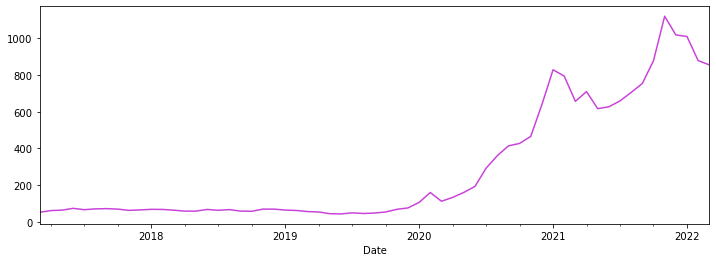

In [36]:
# Resampling the time series data based on months
# we apply it on stock close price
# 'M' indicates month
monthly_resampled_data = tesla.resample('M').mean() ['Close'].plot(figsize=(12,4),c='#C943D9')

 the above command will find the mean closing price
 of each month for a duration of 12 months.

<AxesSubplot:xlabel='Date'>

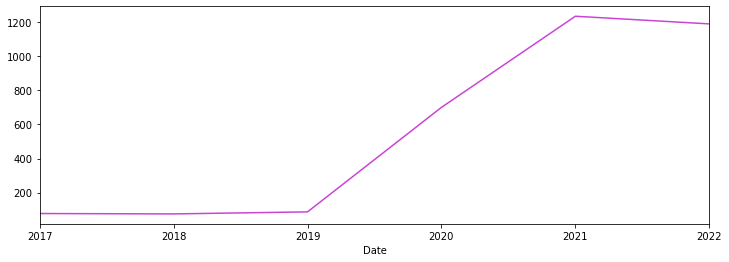

In [42]:
tesla.resample(rule='A').max() ['Open'].plot(figsize=(12,4),c='#C943D5')

In [47]:
weekly_resampled_data = tesla.resample('W').mean() ['Open']
weekly_resampled_data
 
# find the mean opening price of tesla of each week for each week over a period of 1 year.

Date
2017-03-12     49.626801
2017-03-19     50.973200
2017-03-26     51.443200
2017-04-02     54.909200
2017-04-09     59.208400
                 ...    
2022-02-06    903.064001
2022-02-13    916.464001
2022-02-20    894.976001
2022-02-27    793.544998
2022-03-06    856.938000
Freq: W-SUN, Name: Open, Length: 261, dtype: float64

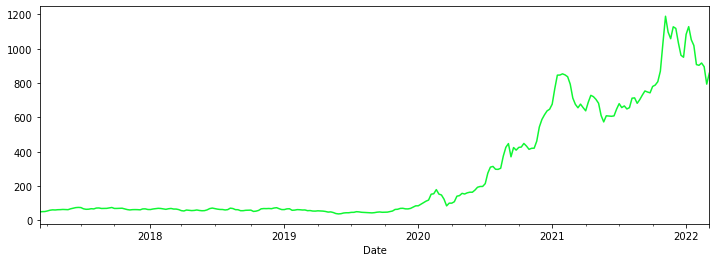

In [49]:
weekly_resampled_data = tesla.resample('W').mean() ['Open'].plot(figsize=(12,4),c='#10F633')

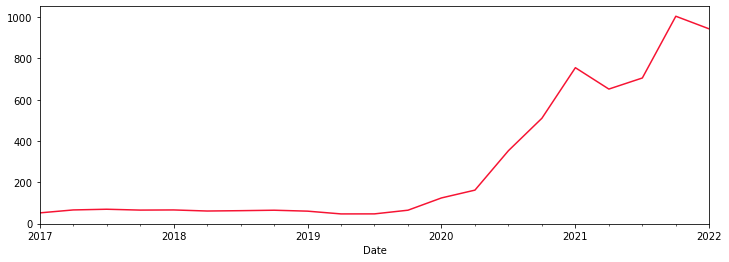

In [53]:
Quater_resampled_data = tesla.resample('Q').mean() ['Open'].plot(figsize=(12,4),c='#F61433')

mean opening price of tesla of each quarter over a period of 1 year.

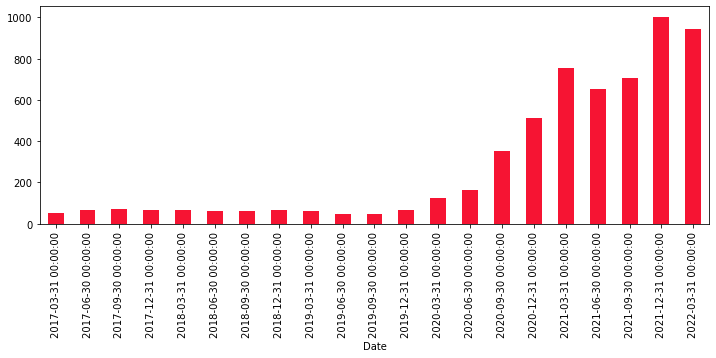

In [57]:
Quater_resampled_data = tesla.resample('Q').mean() ['Open'].plot(kind='bar',figsize=(12,4),color='#F61433')

## Rolling

In [65]:
tesla['High'].rolling(2).sum()

Date
2017-03-06            NaN
2017-03-07     101.118000
2017-03-08     100.792000
2017-03-09      99.745998
2017-03-10      99.031998
                 ...     
2022-02-28    1696.359985
2022-03-01    1766.739990
2022-03-02    1776.359985
2022-03-03    1772.919983
2022-03-04    1742.090027
Name: High, Length: 1260, dtype: float64

In [63]:
tesla['High'].head()

Date
2017-03-06    50.340000
2017-03-07    50.778000
2017-03-08    50.014000
2017-03-09    49.731998
2017-03-10    49.299999
Name: High, dtype: float64

In [68]:
tesla['Open:10 days rolling']=tesla['Open'].rolling(10).mean()

In [70]:
tesla.head(11)

,Date,High,Low,Open,Close,Volume,Adj Close,Open:10 days rolling
Date,,,,,,,,
2017-03-06,2017-03-06,50.340000,49.501999,49.582001,50.242001,16777500.0,50.242001,NaN
2017-03-07,2017-03-07,50.778000,49.664001,50.383999,49.717999,17297500.0,49.717999,NaN
2017-03-08,2017-03-08,50.014000,49.063999,49.400002,49.374001,18626000.0,49.374001,NaN
2017-03-09,2017-03-09,49.731998,48.599998,49.526001,48.980000,19396500.0,48.980000,NaN
2017-03-10,2017-03-10,49.299999,48.599998,49.242001,48.737999,15331500.0,48.737999,NaN
2017-03-13,2017-03-13,49.369999,48.556000,48.964001,49.234001,15113000.0,49.234001,NaN
2017-03-14,2017-03-14,51.624001,49.203999,49.222000,51.599998,37992000.0,51.599998,NaN
2017-03-15,2017-03-15,52.200001,50.854000,51.400002,51.146000,26654000.0,51.146000,NaN
2017-03-16,2017-03-16,53.150002,51.812000,52.480000,52.410000,35661000.0,52.410000,NaN


<AxesSubplot:xlabel='Date'>

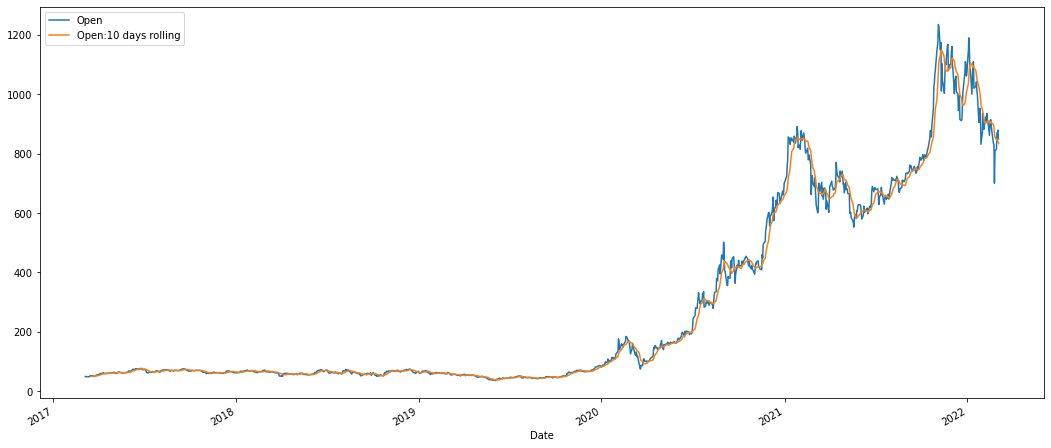

In [74]:
tesla[['Open','Open:10 days rolling']].plot(figsize=(18,8))